In [1]:
# "Data Mining" course Project
# Dimensionality reduction for Spotify music data

# Group 3:
# Athanasios Karampalis
# Reinis Sestakovskis
# Onur Yuksel

# 2022

##################################################

# UMAP

In [2]:
# Install necessary packages

%pip install numpy
%pip install pandas
%pip install seaborn
%pip install umap-learn
%pip install sklearn
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Cleaned up the log!")

Cleaned up the log!


In [5]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import umap
from umap.umap_ import UMAP
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding categorical feature
def one_hot_enc(df,col_name):
    df = df.reset_index(drop=True)
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[col_name]]).toarray())
    df = df.drop(col_name, axis=1)
    df_final = df.join(encoder_df)
    return df_final

In [4]:
def plotting(df):
    df['mult'] = (df['Feature 1']) * (df['Feature 2'])
    # plotting needs changes
    plt.scatter(df['Feature 1'],df['Feature 2'], c= df['mult'])
    plt.colorbar()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    df = df.drop('mult', axis=1)

In [6]:
#Reading the music data from CSV

df = pd.read_csv("data/dataset.csv")
print(len(df))
df = df.dropna()
print(len(df))
df.head()

16269
16268


,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity
0,0,6YIivt0G3ZUuNrM62jp9pL,AJR,Way Less Sad,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.695,0.541,2,-8.350,1,0.0460,0.00707,0.000000,0.1040,0.409,140.018,207600,4,63.0
1,4,4MTmAFWHpvB9kPMSRgLFRp,The Lumineers,WHERE WE ARE,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.573,0.507,11,-8.084,1,0.0342,0.75900,0.000001,0.3770,0.363,123.183,172800,4,64.0
2,8,6y6xhAgZjvxy5kR5rigpY3,"Alesso, Marshmello, James Bay",Chasing Stars (feat. James Bay),37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.594,0.640,10,-6.865,1,0.0330,0.01690,0.000000,0.1350,0.492,92.871,170457,4,72.0
3,12,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain't Worried,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4,96.0
4,18,3o9kpgkIcffx0iSwxhuNI2,Em Beihold,Numb Little Bug,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.742,0.527,8,-6.892,0,0.0769,0.32700,0.000000,0.2500,0.638,84.974,169238,4,79.0


In [7]:
#Feature Selection

from sklearn.preprocessing import StandardScaler

columns_to_select = [
    # "id_x",             # Track id
    # "track.artists",
    # "track.name",
    # "playlist_id",
    # "name",             # Playlist name
    # "track.popularity"
    # "duration_ms",
    "key",
    "danceability",
    "energy",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature"
]

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
df_filtered = df.drop_duplicates(subset=['id_x'])
df_filtered = df_filtered[columns_to_select]


X = df_filtered
X_enc = one_hot_enc(df_filtered,'key')
X_no_key = X.drop('key', axis=1)

# Scale values
scaler = StandardScaler()

# 1 Not encoded key, scaled
X_key_not_encoded_scaled = scaler.fit_transform(X)

# 2 No key, scaled
X_no_key_scaled = scaler.fit_transform(X_no_key)

# 3 Encoded, scaled
X_encoded_scaled = scaler.fit_transform(X_enc)

#UMAP transformations

reducer = umap.UMAP()

# 1 Not encoded key, scaled
embedding_key_not_encoded_scaled = reducer.fit_transform(X_key_not_encoded_scaled)
print(embedding_key_not_encoded_scaled.shape)

# 2 No key, scaled
embedding_no_key_scaled = reducer.fit_transform(X_no_key_scaled)
print(embedding_no_key_scaled.shape)

# 3 Encoded, scaled
embedding_encoded_key_scaled = reducer.fit_transform(X_encoded_scaled)
print(embedding_encoded_key_scaled.shape)

# 4 Not encoded key, not scaled
embedding_key_not_encoded_not_scaled = reducer.fit_transform(X)
print(embedding_key_not_encoded_not_scaled.shape)

# 5 No key, not scaled
embedding_no_key_not_scaled = reducer.fit_transform(X_no_key)
print(embedding_no_key_scaled.shape)

# 6 Encoded, not scaled
embedding_encoded_key_not_scaled = reducer.fit_transform(X_enc)
print(embedding_encoded_key_scaled.shape)


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(14538, 2)
(14538, 2)
(14538, 2)
(14538, 2)
(14538, 2)
(14538, 2)


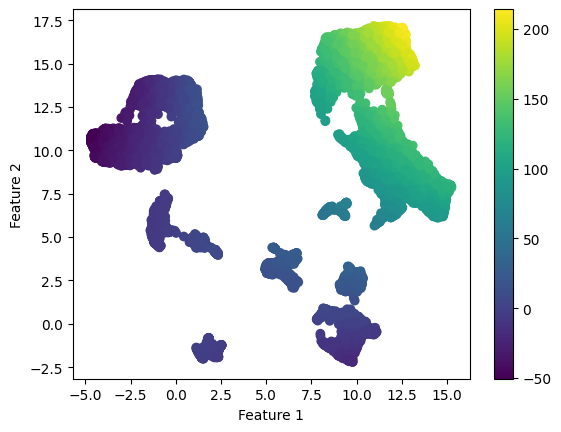

key_not_encoded_scaled


In [27]:
#Plotting 1
low_dim_key_not_encoded_scaled = pd.DataFrame(embedding_key_not_encoded_scaled, columns=['Feature 1', 'Feature 2'])
plotting(low_dim_key_not_encoded_scaled)

print("key_not_encoded_scaled")


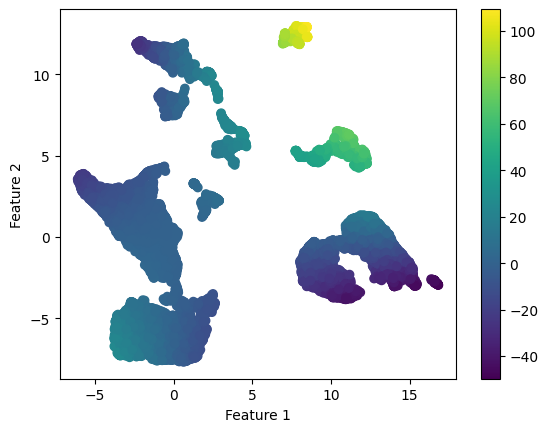

no_key_scaled


In [28]:
#Plotting 2
low_dim_embedding_no_key_scaled = pd.DataFrame(embedding_no_key_scaled, columns=['Feature 1', 'Feature 2'])
plotting(low_dim_embedding_no_key_scaled)

print("no_key_scaled")


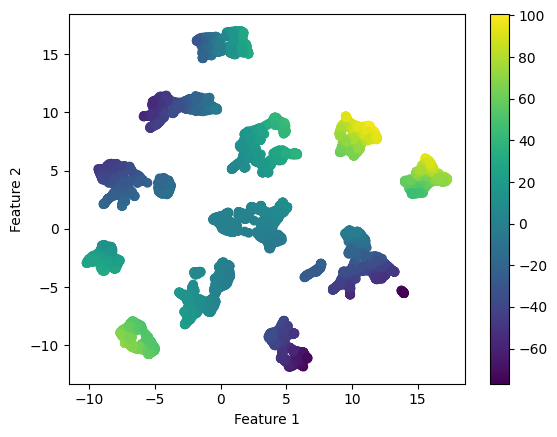

encoded_key_scaled


In [29]:
#Plotting 3
low_dim_embedding_encoded_key_scaled = pd.DataFrame(embedding_encoded_key_scaled, columns=['Feature 1', 'Feature 2'])
plotting(low_dim_embedding_encoded_key_scaled)
print("encoded_key_scaled")


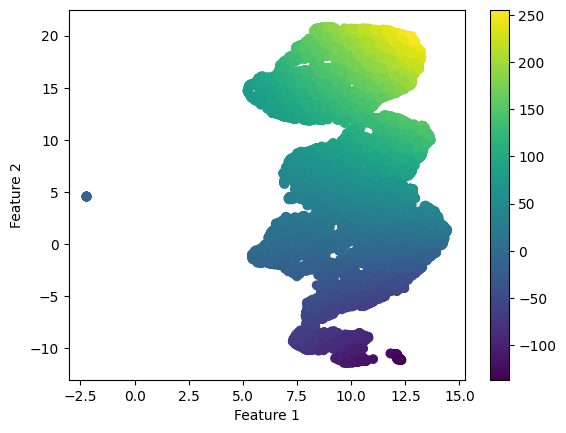

key_not_encoded_not_scaled


In [30]:
#Plotting 4
low_dim_embedding_key_not_encoded_not_scaled = pd.DataFrame(embedding_key_not_encoded_not_scaled, columns=['Feature 1', 'Feature 2'])
plotting(low_dim_embedding_key_not_encoded_not_scaled)

print("key_not_encoded_not_scaled")

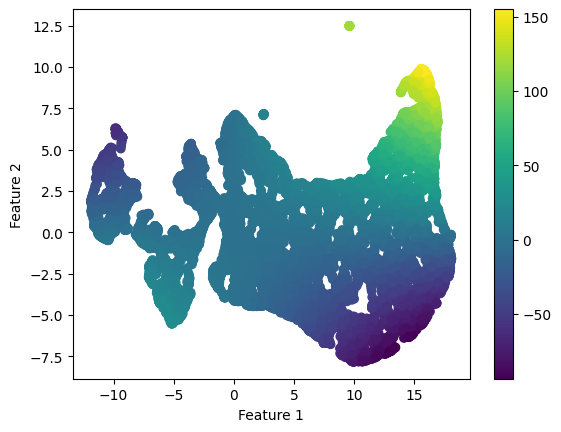

no_key_not_scaled


In [31]:
#Plotting 5
low_dim_embedding_no_key_not_scaled = pd.DataFrame(embedding_no_key_not_scaled, columns=['Feature 1', 'Feature 2'])
plotting(low_dim_embedding_no_key_not_scaled)

print("no_key_not_scaled")

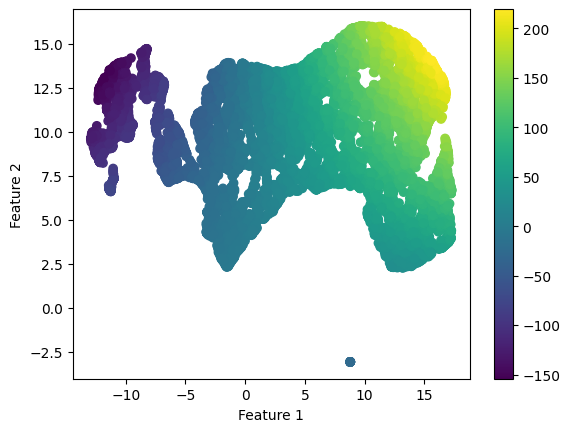

encoded_key_not_scaled


In [32]:
#Plotting 6
low_dim_embedding_encoded_key_not_scaled = pd.DataFrame(embedding_encoded_key_not_scaled, columns=['Feature 1', 'Feature 2'])
plotting(low_dim_embedding_encoded_key_not_scaled)

print("encoded_key_not_scaled")

In [10]:
#Run trustworthiness
from sklearn.manifold import trustworthiness as trustworthiness
print("Trustworthiness Score : (With values in [0,1], with 1 being the best)")

score1=trustworthiness(low_dim_key_not_encoded_scaled,X_key_not_encoded_scaled,n_neighbors=5, metric='euclidean')
print(f"key_not_encoded_scaled : {score1}")

score2=trustworthiness(low_dim_embedding_no_key_scaled,X_no_key_scaled,n_neighbors=5, metric='euclidean')
print(f"no_key_scaled : {score2}")


score3=trustworthiness(low_dim_embedding_encoded_key_scaled,X_encoded_scaled,n_neighbors=5, metric='euclidean')
print(f"encoded_key_scaled : {score3}")


score4=trustworthiness(low_dim_embedding_key_not_encoded_not_scaled,X,n_neighbors=5, metric='euclidean')
print(f"not_encoded_not_scaled : {score4}")

score5=trustworthiness(low_dim_embedding_no_key_not_scaled,X_no_key,n_neighbors=5, metric='euclidean')
print(f"no_key_not_scaled : {score5}")

score6=trustworthiness(low_dim_embedding_encoded_key_not_scaled,X_enc,n_neighbors=5, metric='euclidean')
print(f"key_not_encoded_scaled : {score6}")

Trustworthiness Score : (With values in [0,1], with 1 being the best)
key_not_encoded_scaled : 0.9919797143627299
no_key_scaled : 0.993635624871649
encoded_key_scaled : 0.9985621638316065
not_encoded_not_scaled : 0.9984427217675831
no_key_not_scaled : 0.9991467722011385


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


key_not_encoded_scaled : 0.9991386448424742
